# Personal Finance Data Analysis

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
pfd = pd.read_csv(Path("Resources/personal_finance_data.csv"), index_col="Date / Time", parse_dates=True, infer_datetime_format=True)
pfd.sort_index(ascending = True, inplace = True)
pfd.dropna()

,Mode,Category,Sub category,Income/Expense,Debit/Credit
Date / Time,,,,,
2021-01-01,CUB - online payment,Allowance,From dad,Income,8000.0
2021-01-01,CUB - online payment,Food,Snacks,Expense,85.0
2021-01-03,CUB - online payment,Other,From dad,Income,500.0
2021-01-03,CUB - online payment,Household,Stuffs,Expense,6667.0
2021-01-03,CUB - online payment,Transportation,Metro,Expense,30.0
...,...,...,...,...,...
2021-12-30,CUB - online payment,Other,From Deepak,Income,250.0
2021-12-30,CUB - online payment,Food,Horlicks + kolakattai,Expense,25.0
2021-12-30,CUB - online payment,Salary,office,Income,55530.0


In [4]:
pfd.drop(['Mode'],axis=1, inplace=True)

In [5]:
pfd.rename(columns={"Sub category": "Description","Debit/Credit":"Amount"},inplace=True)
pfd.index.names = ['Date']

# Create a function that operates on the new row called "Transaction Type", that defines Debit/Credit based on Income/Expense
def f(row):
    if row['Income/Expense'] == "Income":
        val = "Credit"
    else:
        val = "Debit"
    return val

pfd['Transaction Type'] = pfd.apply(f, axis=1)
pfd

,Category,Description,Income/Expense,Amount,Transaction Type
Date,,,,,
2021-01-01,Allowance,From dad,Income,8000.0,Credit
2021-01-01,Food,Snacks,Expense,85.0,Debit
2021-01-03,Other,From dad,Income,500.0,Credit
2021-01-03,Household,Stuffs,Expense,6667.0,Debit
2021-01-03,Transportation,Metro,Expense,30.0,Debit
...,...,...,...,...,...
2021-12-30,Other,From Deepak,Income,250.0,Credit
2021-12-30,Food,Horlicks + kolakattai,Expense,25.0,Debit
2021-12-30,Salary,office,Income,55530.0,Credit


In [6]:
pfd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2021-01-01 to 2021-12-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          225 non-null    object 
 1   Description       225 non-null    object 
 2   Income/Expense    225 non-null    object 
 3   Amount            225 non-null    float64
 4   Transaction Type  225 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.5+ KB


## Debit Analysis

In [16]:
debits = pfd[pfd["Transaction Type"] == 'Debit']

In [23]:
def count_sum(pfd ,column: str, plot = "Pie"):
    by_column = pfd\
                .groupby(column)\
                .agg({"Transaction Type": "count", "Amount": "sum"})\
                .reset_index()
    by_column.columns = [column, "Transaction Type", "Amount"]
    
    labels = by_column[column]

    fig = None
    
    if plot == 'Pie':
        fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Amount', 'Transaction Type'])
        fig.add_trace(
            go.Pie(
                labels=labels,
                values=by_column["Amount"],
                name="Amount"
            ),
        1, 1)
        fig.add_trace(
            go.Pie(
                labels=labels,
                values=by_column["Transaction Type"],
                name="Transaction Type"
            ),
        1, 2)
    elif plot == 'Scatter':
        fig = make_subplots(1, 2,
                    subplot_titles=['Amount', 'Transaction Type'])
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Amount"],
                name="Amount"
            ),
        1, 1)
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Transaction Type"],
                name="Transaction Type"
            ),
        1, 2)
        

    fig.update_layout(title_text=f"{column} Analysis")
    fig.show()
    
    return by_column

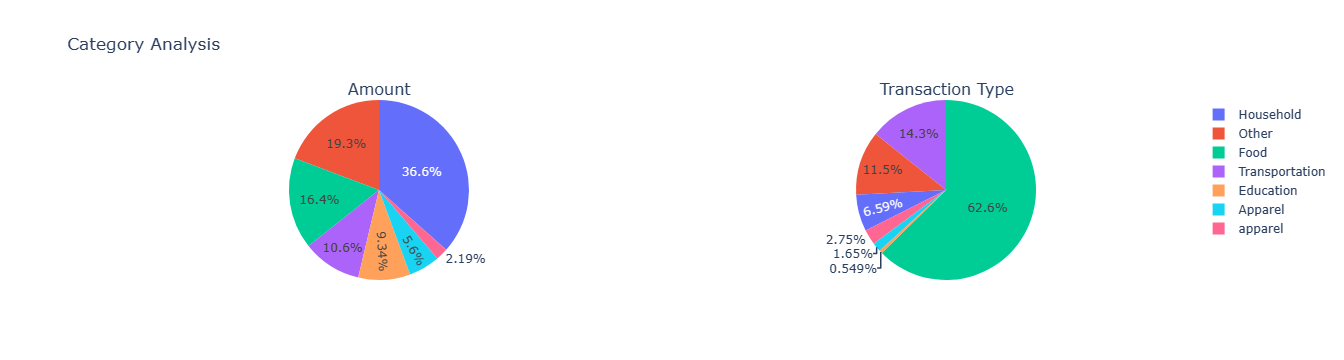

,Category,Transaction Type,Amount
0,Apparel,3,8396.00
1,Education,1,14000.00
2,Food,114,24607.76
3,Household,12,54810.00
4,Other,21,28887.00
5,Transportation,26,15873.80
6,apparel,5,3278.72


In [24]:
pfd_by_cat = count_sum(debits, "Category")
pfd_by_cat

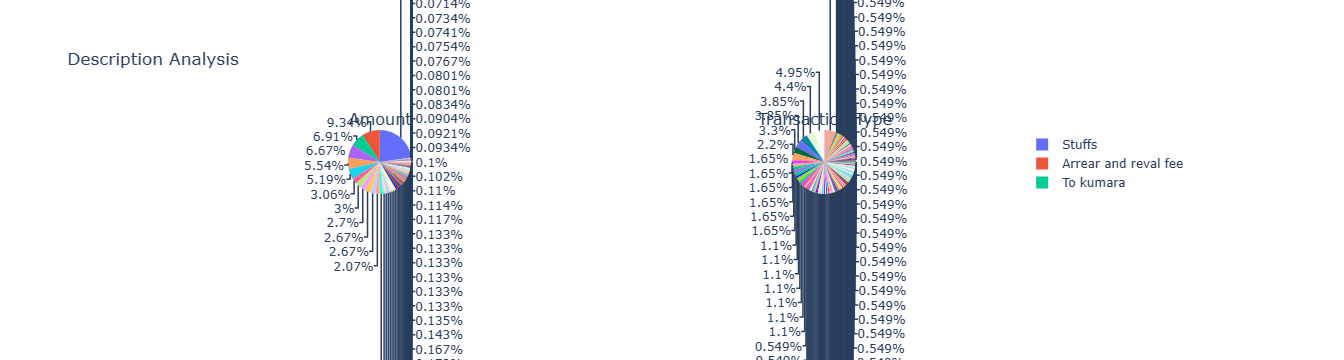

,Description,Transaction Type,Amount
0,Arrear and reval fee,1,14000.0
1,Auto to Gobi's place,1,214.0
2,Badminton,1,200.0
3,Banana,1,10.0
4,Bean bag,3,8297.0
...,...,...,...
113,Travel to koyambedu,1,138.0
114,Vnr to apk,1,50.0
115,Water,3,70.0
116,Zinger box meal,1,279.0


In [25]:
pfd_by_payment_way = count_sum(debits, "Description")
pfd_by_payment_way

## Credit Analysis

In [29]:
credits = pfd[pfd["Transaction Type"] == 'Credit']

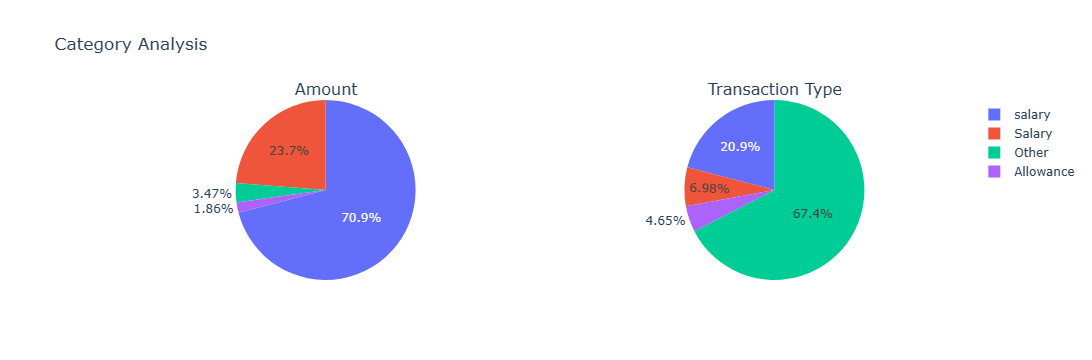

,Category,Transaction Type,Amount
0,Allowance,2,13000.0
1,Other,29,24237.0
2,Salary,3,165770.0
3,salary,9,495140.0


In [30]:
pfd_cr_by_cat = count_sum(credits, "Category")
pfd_cr_by_cat